**Table of contents**<a id='toc0_'></a>    
- [K Medoids Implementation](#toc1_1_)    
  - [K Modes Implementation](#toc1_2_)    
  - [PCA KMeans Implementation](#toc1_3_)    
  - [Hierarchical clustering](#toc1_4_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [125]:
%pip install kmodes scikit-learn-extra 


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [126]:
# Standard imports
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

# Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder 
from sklearn.decomposition import PCA

# Non-Hierarchical Clustering Models
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
from kmodes.kmodes import KModes
from sklearn.cluster import DBSCAN

# Hierarchical Clustering
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from scipy.spatial.distance import pdist

# Metrics
from sklearn.metrics import silhouette_samples, silhouette_score

# Extra
output_dir = 'main/'
os.makedirs(output_dir, exist_ok=True)

In [127]:
path = 'FoodInsecurity_Hispanic_Demographics_Tone_Preferences_Dataset.xlsx'

In [128]:
df = pd.read_excel(path)

In [129]:
demographics = df[['age', 'gender', 'ethnicity', 'race', 'education', 'marital_status', 'income', 'employment', 'language', 'disability', 'states']]
demographics.head(3)

,age,gender,ethnicity,race,education,marital_status,income,employment,language,disability,states
0,45-54,female,non hispanic,native american,High School,na,"$25,000 - $49,999",Employed Part time,both,i do not have a disability,indiana
1,18-24,male,hispanic,white,High School,single,"Less than $25,000",Employed Part time,english,i do not have a disability,illinois
2,25-34,female,non hispanic,multiracial,Associate,single,"Less than $25,000",Student,english,i do not have a disability,new York


In [130]:
tones = df[['sample_1','sample_2', 'sample_3', 'sample_4', 'sample_5', 'sample_6', 'sample_7','sample_8']]

In [131]:
tones.head(3)

,sample_1,sample_2,sample_3,sample_4,sample_5,sample_6,sample_7,sample_8
0,Persuasive,Simplier,Empathetic,Persuasive,Original,Original,Persuasive,Original
1,Original,Simplier,Empathetic,Simplier,Simplier,Original,Original,Persuasive
2,Original,Original,Simplier,Simplier,Empathetic,Empathetic,Empathetic,Simplier


## <a id='toc1_1_'></a>[Encoding | Scaling](#toc0_)

In [132]:
tones_list = tones.columns.tolist()

In [133]:
encoder = LabelEncoder()

for question in tones_list:
    tones.loc[:, question] = encoder.fit_transform(tones[question])
tones.head(3)

,sample_1,sample_2,sample_3,sample_4,sample_5,sample_6,sample_7,sample_8
0,2,3,0,2,1,1,2,1
1,1,3,0,3,3,1,1,2
2,1,1,3,3,0,0,0,3


In [134]:
scaler = StandardScaler()
tones_scaled = scaler.fit_transform(tones)

## Agglomerative Hierarchical Clustering

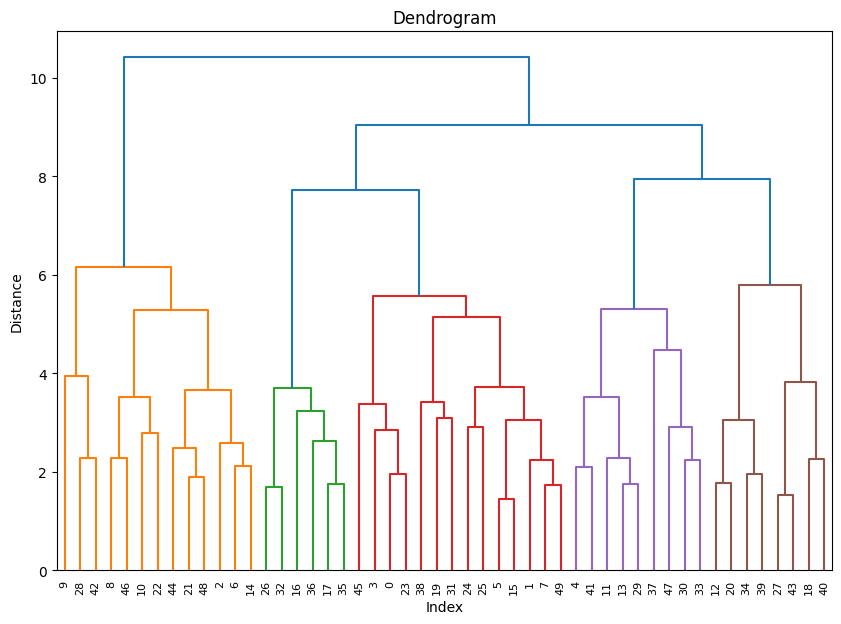

In [135]:
agg_clustering = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward')

clusters = agg_clustering.fit_predict(tones_scaled)
linked = linkage(tones_scaled, method='ward')

plt.figure(figsize=(10, 7))
dendrogram(linked, labels=df.index, distance_sort='ascending')
plt.title('Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
plt.show()

In [136]:
# Calculate cophenetic correlation coefficient
c, coph_dists = cophenet(linked, pdist(tones_scaled))
print(f"Cophenetic Correlation Coefficient: {c}")


Cophenetic Correlation Coefficient: 0.5007466560415824


In [137]:
import plotly.figure_factory as ff
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster, cophenet
from scipy.spatial.distance import pdist

# Perform hierarchical clustering using scipy
Z = linkage(tones_scaled, method='ward')

# Calculate original pairwise distances
original_dist = pdist(tones_scaled)

# Calculate cophenetic distances and cophenetic correlation
c, coph_dists = cophenet(Z, original_dist)
print(f'Cophenetic correlation coefficient: {c}')

# Get cluster labels using a chosen criterion (e.g., maximum distance)
max_d = 10  # Adjust threshold as needed
cluster_lab = fcluster(Z, max_d, criterion='distance')

# Create dendrogram using Plotly
fig = ff.create_dendrogram(tones_scaled, orientation='bottom')
fig.update_layout(width=800, height=600)

# Add cophenetic correlation coefficient to the plot title
fig.update_layout(title=f'Dendrogram (Cophenetic correlation: {c:.2f})')

fig.show()


Cophenetic correlation coefficient: 0.5007466560415824


In [138]:
X = tones_scaled

# Define parameters to tune
linkage_methods = ['ward', 'complete', 'average', 'single']
affinity_metrics = ['euclidean', 'manhattan', 'cosine']
n_clusters_range = range(2, 50)  # Adjust based on your dataset and requirements

# Lists to store results
best_silhouette_score = -1
best_params = {}


# Perform parameter tuning
for linkage in linkage_methods:
    for affinity in affinity_metrics:
        # Skip combinations that are incompatible
        if (linkage == 'ward' and affinity != 'euclidean'):
            continue
        
        for n_clusters in n_clusters_range:
            model = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage, metric=affinity)
            cluster_labels = model.fit_predict(X)
            silhouette_avg = silhouette_score(X, cluster_labels)
            
            # Track the best parameters based on silhouette score
            if silhouette_avg > best_silhouette_score:
                best_silhouette_score = silhouette_avg
                best_params = {'linkage': linkage, 'affinity': affinity, 'n_clusters': n_clusters}

# Output the best parameters found
print(f"Best Parameters: {best_params}")
print(f"Best Silhouette Score: {best_silhouette_score}")

Best Parameters: {'linkage': 'ward', 'affinity': 'euclidean', 'n_clusters': 12}
Best Silhouette Score: 0.1720398158042563


## <a id='toc1_2_'></a>[K Modes Implementation](#toc0_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 9, cost: 237.0
Run 1, iteration: 2/100, moves: 2, cost: 237.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 2, cost: 238.0
Run 2, iteration: 2/100, moves: 5, cost: 233.0
Run 2, iteration: 3/100, moves: 2, cost: 233.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 7, cost: 240.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 13, cost: 235.0
Run 4, iteration: 2/100, moves: 1, cost: 235.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 8, cost: 236.0
Run 5, iteration: 2/100, moves: 1, cost: 236.0
Best run was number 2
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, mo

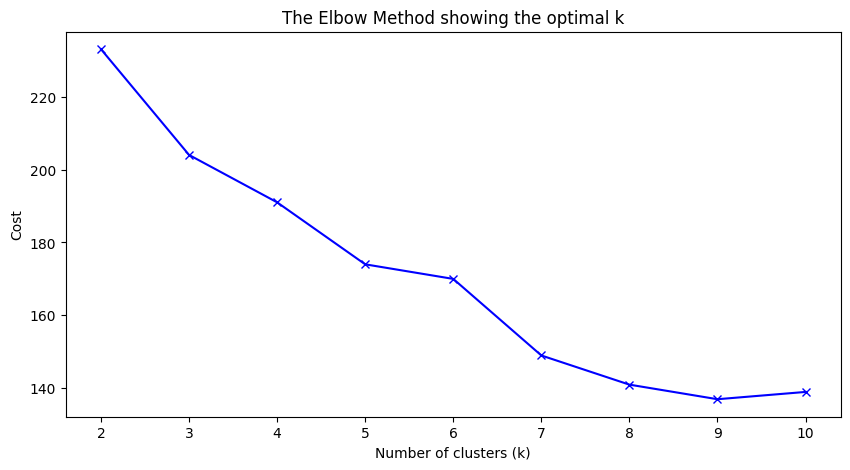

In [139]:
# Elbow method and silhouette scores for KModes
cost = []
silhouette_scores = []
K = range(2, 11)

for k in K:
    kmodes = KModes(n_clusters=k, init='Huang', n_init=5, verbose=1, random_state=42)
    clusters = kmodes.fit_predict(tones)
    cost.append(kmodes.cost_)

# Plot the Elbow Method
plt.figure(figsize=(10, 5))
plt.plot(K, cost, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Cost')
plt.title('The Elbow Method showing the optimal k')
plt.show()


## <a id='toc1_3_'></a>[PCA KMeans Implementation](#toc0_)

In [140]:
encoder.classes_

array(['Empathetic', 'Original', 'Persuasive', 'Simplier'], dtype=object)

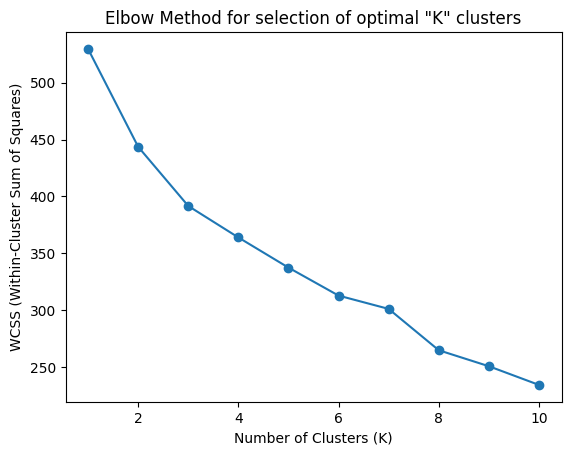

In [141]:
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(tones)
    wcss.append(kmeans.inertia_)  # Inertia is the WCSS

# Plotting the elbow curve
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for selection of optimal "K" clusters')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()

## K-Means

In [142]:
# Define the number of clusters
num_clusters = 4

# Create an instance of the KMeans model
kmeans = KMeans(n_clusters=num_clusters, n_init='auto')

# Fit the model to the data
kmeans.fit(tones)

# Get the cluster labels for each data point
labels = kmeans.labels_

# Get the cluster centers
centers = kmeans.cluster_centers_

## PCA

In [143]:
pca = PCA(n_components=5)
tones_pca = pca.fit_transform(tones)

# Access the principal components
principal_components = pca.components_

# Access the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

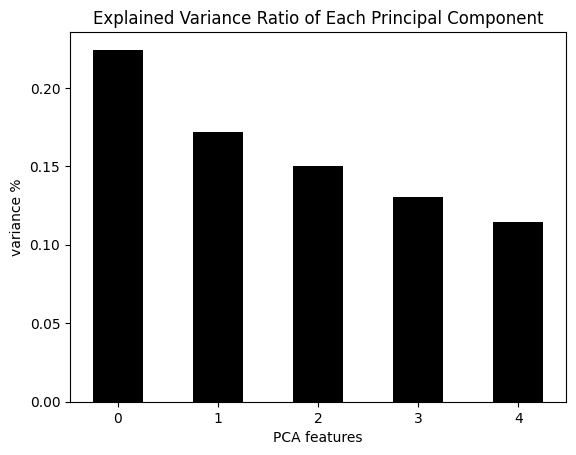

In [144]:
# the explained variance ratio of each principal component obtained from PCA-variance drop off point is 3
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black', width=0.5)
plt.title("Explained Variance Ratio of Each Principal Component")
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)
# plt.savefig('PCA_Features.png')
plt.show()

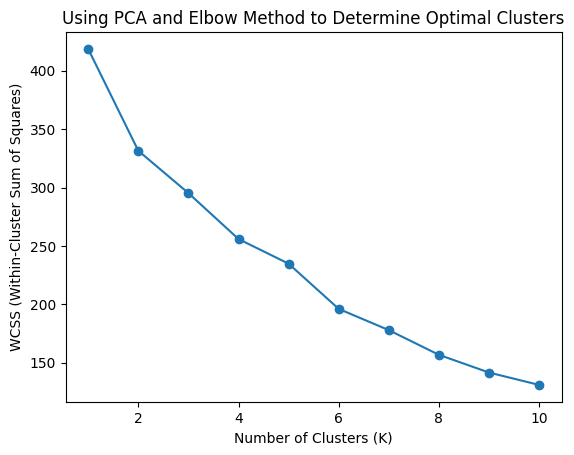

In [145]:
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(tones_pca)
    wcss.append(kmeans.inertia_)  # Inertia is the WCSS

# Plotting the elbow curve
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Using PCA and Elbow Method to Determine Optimal Clusters')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()

For n_clusters = 2, the average silhouette score is: 0.18211133440182617
For n_clusters = 3, the average silhouette score is: 0.14440687193033716
For n_clusters = 4, the average silhouette score is: 0.15125374922496934
For n_clusters = 5, the average silhouette score is: 0.14904297496063426
For n_clusters = 6, the average silhouette score is: 0.17973988936785049
For n_clusters = 7, the average silhouette score is: 0.18228033704389213
For n_clusters = 8, the average silhouette score is: 0.19768172188019556
For n_clusters = 9, the average silhouette score is: 0.2005971183110062
For n_clusters = 10, the average silhouette score is: 0.1985076898075979
For n_clusters = 11, the average silhouette score is: 0.1805834070342129


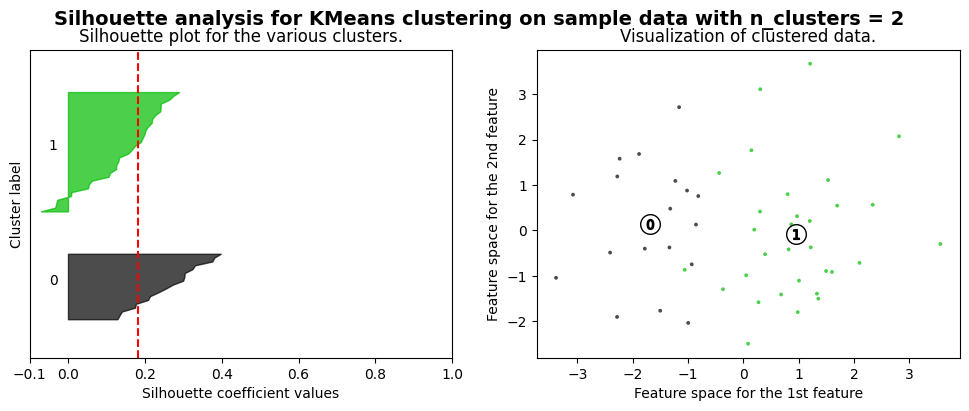

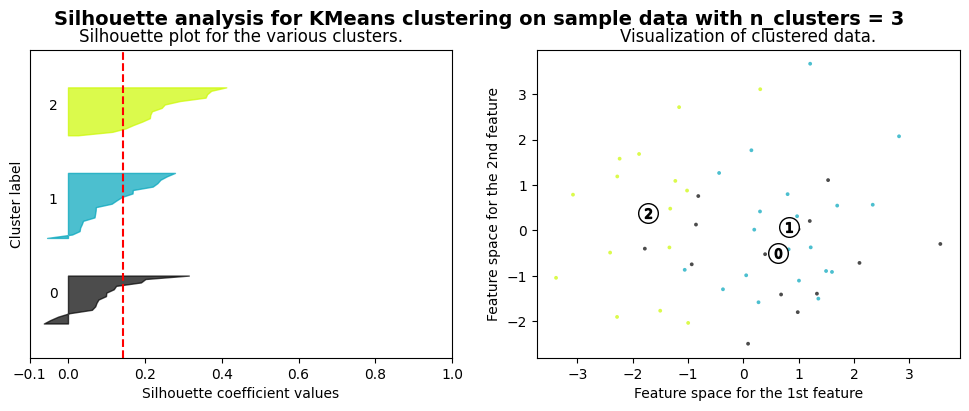

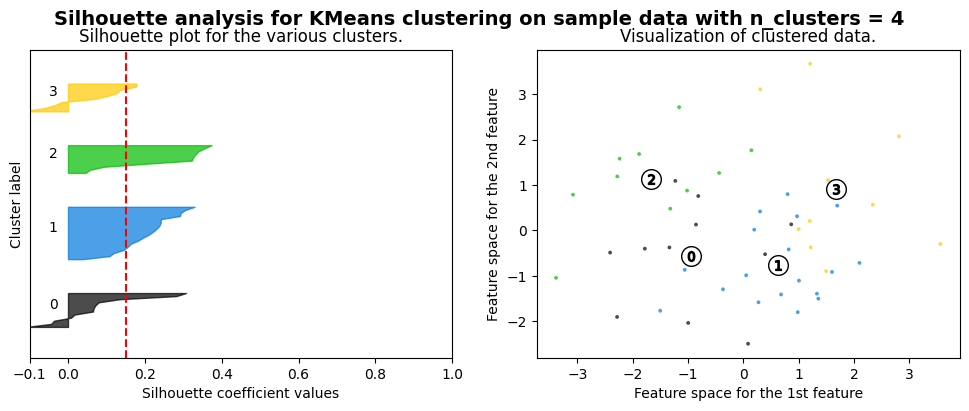

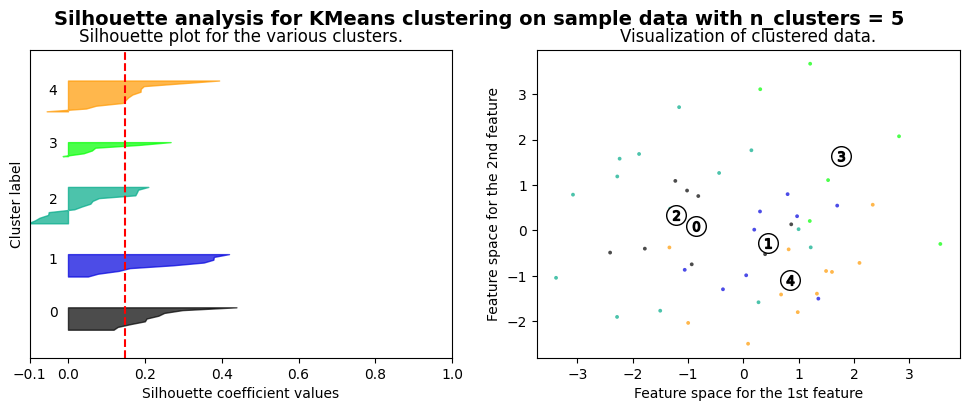

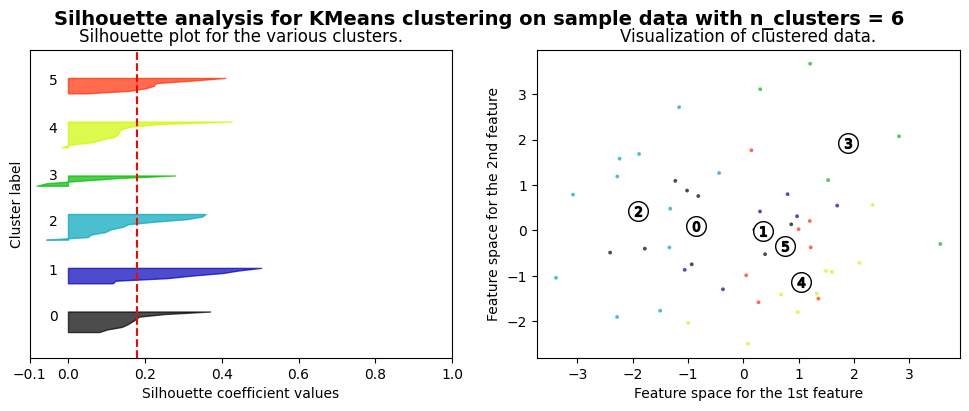

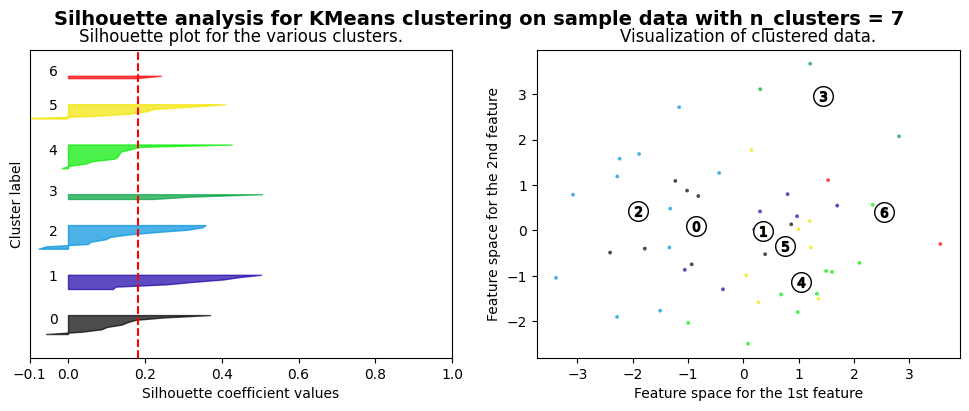

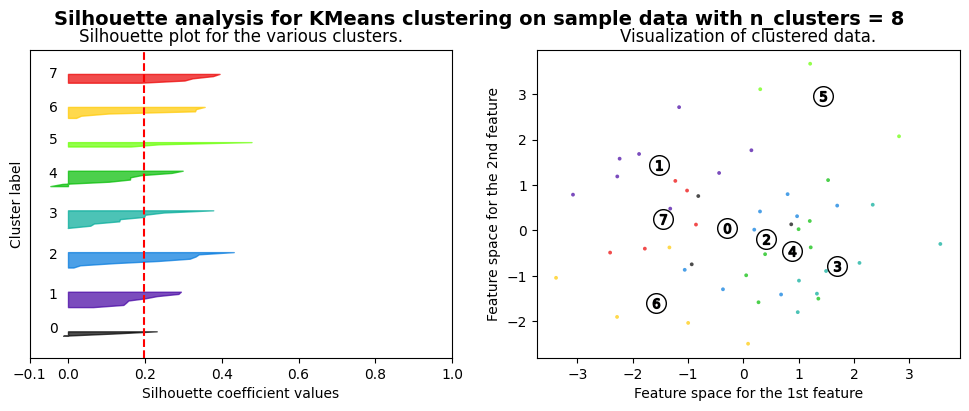

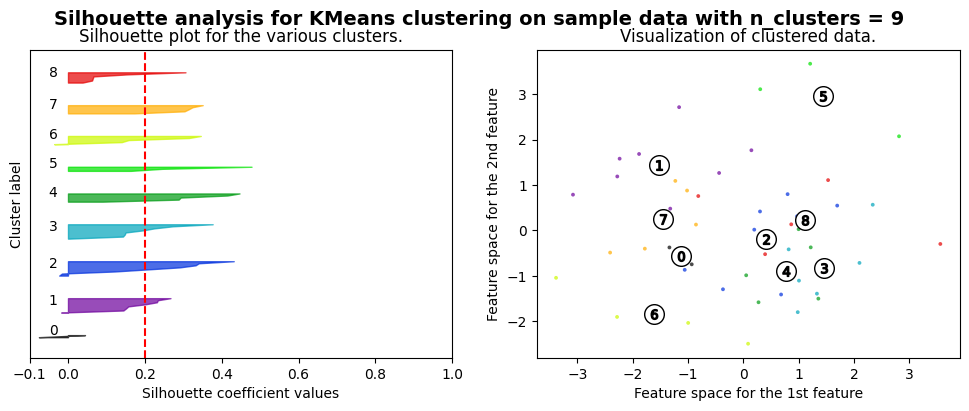

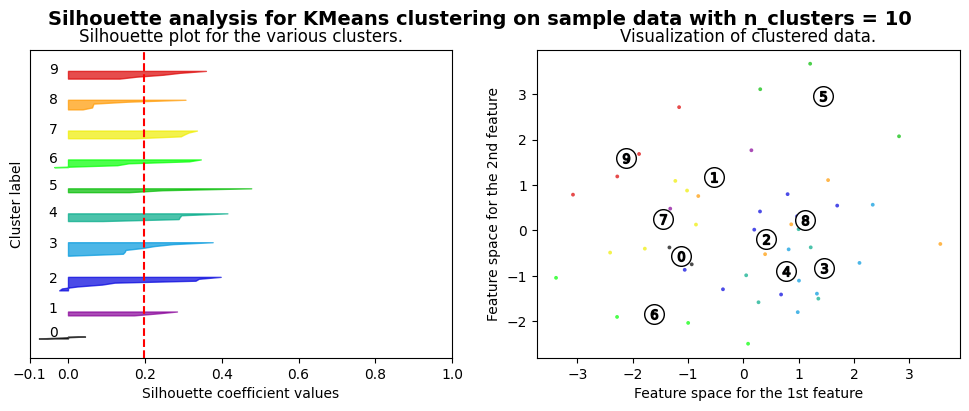

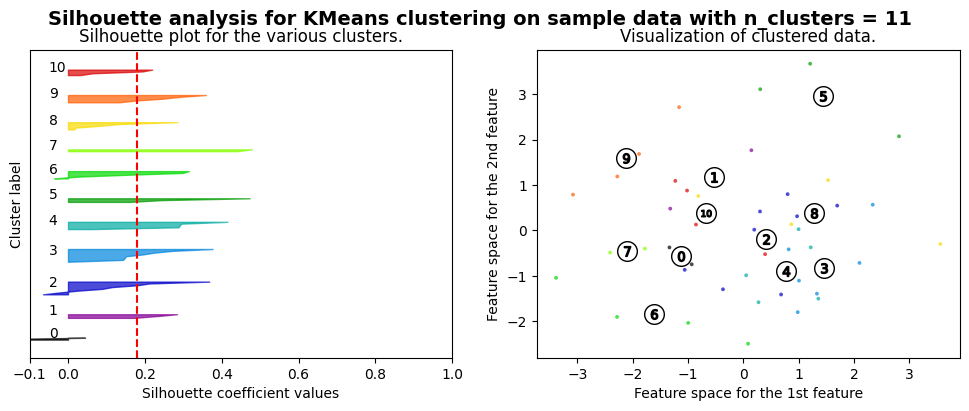

In [146]:

# Range of cluster numbers (K) to evaluate
range_n_clusters = [2, 3, 4, 5, 6, 7,8,9,10,11]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1, but in this example, all lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette plots of individual clusters
    ax1.set_ylim([0, len(tones_pca) + (n_clusters + 1) * 10])

    # Initialize the KMeans object and fit it to the data
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init='auto')
    cluster_labels = kmeans.fit_predict(tones_pca)

    # Compute the silhouette score for the current clustering
    silhouette_avg = silhouette_score(tones_pca, cluster_labels)
    print(f"For n_clusters = {n_clusters}, the average silhouette score is: {silhouette_avg}")

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(tones_pca, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to the current cluster
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        # Sort the silhouette scores
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        # Fill the silhouette plot
        color = plt.cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plot with cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for the next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("Silhouette plot for the various clusters.")
    ax1.set_xlabel("Silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for the average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])  # Clear the y-axis labels
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = plt.cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(tones_pca[:, 0], tones_pca[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = kmeans.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("Visualization of clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    # Save the figure to a file
    plt.savefig(os.path.join(output_dir, f'silhouette_analysis_n_clusters_{n_clusters}.png'))

plt.show()

## <a id='toc1_4_'></a>[Hierarchical clustering](#toc0_)